- MNIST Dataset: http://yann.lecun.com/exdb/mnist/

- Has 60000 images in the training set and 10000 images in the test set.
    - Each image has a size of 28*28 px

In [1]:
# load some general libraries
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.9.2'

# Loading MNIST Dataset

- Tensorflow has an inbuilt MNIST Dataset: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data

- `tensorflow.keras.datasets` has `mnist` module, which has a `load_data()` function. 

- It returns a tuple of numpy arrays as `(x_train, y_train), (x_test, y_test)`

- `x_train`: numpy array of grayscale image data with 60000 samples.

- `y_train`: digit labels for the 60000 training samples.

- `x_test`: numpy array of grayscale image data with 10000 samples.

- `y_test`: digit labels for 10000 testing samples

In [3]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Visualizing dataset size & dimensions

In [4]:
# see the shapes
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


## Visualising the content of the training and test set

In [5]:
# visualizing the training set
print('Dimensions:', x_train[0].ndim)
print('Shape:', x_train[0].shape)
print('One matrix:')
print(x_train[0])

Dimensions: 2
Shape: (28, 28)
One matrix:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0 

In [6]:
# visualizing the output lables for the training set
print(y_train[0:10])

[5 0 4 1 9 2 1 3 1 4]


## Plotting a single handwritten digit image

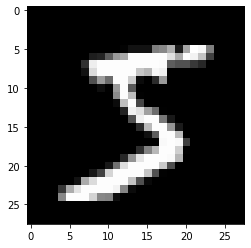

In [7]:
image = x_train[0]

fig = plt.figure()
plt.imshow(image, cmap = 'gray')
plt.show()

## Plotting multiple handwritten digit images

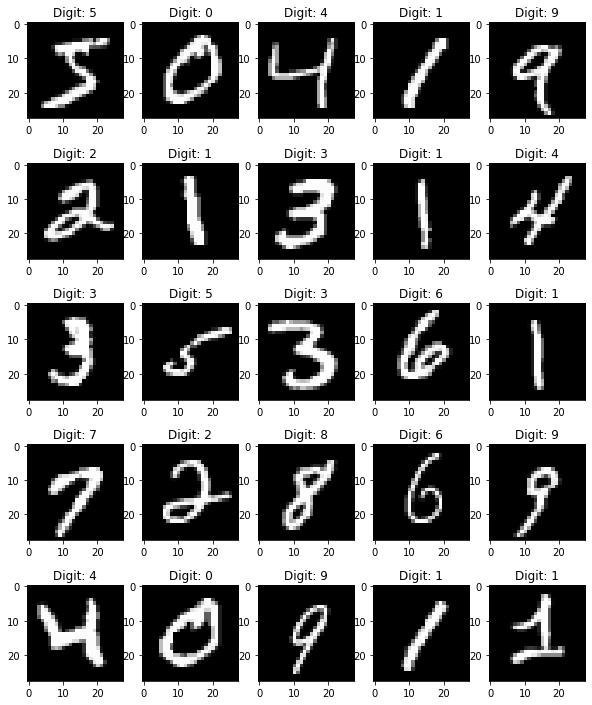

In [8]:
# plot first 25 handwritten digits
n = 25

images = x_train[:n]
labels = y_train[:n]

plot_rows = 5
plot_cols = 5

fig, axes = plt.subplots(plot_rows, plot_cols, figsize = (2 * plot_cols, 2.5 * plot_rows))
for i in range(n):
    ax = axes[i // plot_cols, i % plot_cols]
    ax.imshow(images[i], cmap = 'gray')
    ax.set_title(f'Digit: {labels[i]}')

plt.show()

# Preparing Pixel Data

## Reshaping dataset

- Reshape `x_train, x_test` into a single color channel.

In [10]:
# reshape dataset to have a single channel
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [11]:
print(x_train.ndim)
print(x_train.shape)
print(x_train[0].ndim)
print(x_train[0].shape)

4
(60000, 28, 28, 1)
3
(28, 28, 1)


In [12]:
print(x_test.ndim)
print(x_test.shape)
print(x_test[0].ndim)
print(x_test[0].shape)

4
(10000, 28, 28, 1)
3
(28, 28, 1)


## Encoding target variable

- Do OneHotEncoding for target variable in training and test set.

In [13]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [14]:
print(y_train.ndim)
print(y_train.shape)
print(y_train[0].shape)
print(y_train[0])

2
(60000, 10)
(10,)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [15]:
print(y_test.ndim)
print(y_test.shape)
print(y_test[0].shape)
print(y_test[0])

2
(10000, 10)
(10,)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


## Feature Scaling

- Pixel intensity values are from 1 to 255.

- Lets normalize those values i.e, they will take a range between 0 and 1.

- Divide each value by 255.

In [16]:
# normalize image pixel intensities
x_train = x_train / 255.0
x_test = x_test / 255.0

In [17]:
print(x_train.ndim)
print(x_train.shape)
print(x_train[0].ndim)
print(x_train[0].shape)
print('-----')
print(x_test.ndim)
print(x_test.shape)
print(x_test[0].ndim)
print(x_test[0].shape)

4
(60000, 28, 28, 1)
3
(28, 28, 1)
-----
4
(10000, 28, 28, 1)
3
(28, 28, 1)


# Define the model

- Lets try out an initial architecture. Later, we can do some improvements.

- 2 things: CNN + ANN for predictions

- Use a single convolutional layer, with:
    - a feature detector (filter) of size 3*3.
    - 32 filters

- Next, use a Max Pooling layer.

- Next, use a Flattening layer.

- Now, use a fully-connected (hidden) layer with:
    - 100 units (neurons)

- For both the Conv layer and the hidden layer, use:
    - ReLU activation (best practice)
    - He weight initialization scheme (best practice)

- Next comes the output layer with:
    - 10 neurons (since we have 10 output labels)
    - softmax activation

- When compiling the model:
    - use a Stochastic Gradient Descent optimiser, with:
        - learning rate of 0.01
        - momentum of 0.9
    - use categorical cross-entropy as the loss function

In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential()

# add 1st Convolutional layer (connects to input layer)
model.add(
    Conv2D(
        32, # filters
        (3, 3), # filter size (kernel size)
        kernel_initializer = 'he_uniform',
        activation = 'relu',
        input_shape = (28, 28, 1), # x_train[i].shape
    )
)

# add Max Pooling layer
model.add(
    MaxPool2D(pool_size = (2, 2))
)

# add a Flattening layer
model.add(Flatten())

# Now, add the ANN
# add a hidden layer (Dense, fully connected)
model.add(
    Dense(
        units = 100,
        activation = 'relu',
        kernel_initializer = 'he_uniform'
    )
)

# add the output layer
model.add(
    Dense(units = 10, activation = 'softmax')
)

## Compile the model

In [19]:
from tensorflow.keras.optimizers import SGD

optimiser = SGD(learning_rate = 0.01, momentum = 0.9)

model.compile(
    optimizer = optimiser,
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

# Train & Evaluate the model

- Train for 10 epochs using a batch size of 32, with the test set as the validation data.

In [21]:
# train the model
model.fit(x_train, y_train, batch_size = 32, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 52s 27ms/step - loss: 0.1615 - accuracy: 0.9512 - val_loss: 0.0634 - val_accuracy: 0.9790
Epoch 2/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0562 - accuracy: 0.9830 - val_loss: 0.0533 - val_accuracy: 0.9836
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0362 - accuracy: 0.9892 - val_loss: 0.0485 - val_accuracy: 0.9845
Epoch 4/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0248 - accuracy: 0.9926 - val_loss: 0.0413 - val_accuracy: 0.9857
Epoch 5/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0179 - accuracy: 0.9945 - val_loss: 0.0377 - val_accuracy: 0.9878
Epoch 6/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0125 - accuracy: 0.9965 - val_loss: 0.0413 - val_accuracy: 0.9863
Epoch 7/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0081 - accuracy: 0.9981 - val_loss: 0.0371 -

In [22]:
# evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.0401 - accuracy: 0.9888


In [23]:
print(loss)

0.04006801173090935


In [24]:
print(accuracy)

0.9887999892234802


- Refer to https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/ for improving the model.